# Data Cleaning

Importing useful libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Loading in the data

In [2]:
df = pd.read_csv('../input/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2020-09-14.csv')
print(df.shape)
df.head()

(4572257, 8)


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
bitcoin_df = df.copy() # making a copy of the dataset to work with

In [4]:
time_col = pd.to_datetime(bitcoin_df['Timestamp'], unit='s') # converting the 'Timestamp' column to 
                                                             # datetime object

bitcoin_df.drop('Timestamp', axis=1, inplace=True) # drops the 'Timestamp' column
bitcoin_df['Timestamp'] = time_col # creates a new 'Timestamp' column with datetime dtype
bitcoin_df.set_index('Timestamp', inplace=True) # makes 'Timestamp' the index

bitcoin_df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
missing_val_mask = bitcoin_df.isnull() # creating a dataframe with boolean values indicating the presence of 
                                       # missing value
missing_val_mask.sum()

Open                 1241716
High                 1241716
Low                  1241716
Close                1241716
Volume_(BTC)         1241716
Volume_(Currency)    1241716
Weighted_Price       1241716
dtype: int64

Let's check if all columns have Nan values for each row with any Nan value. 

In [6]:
missing_val_mask.sum(axis=1).sum() == len(bitcoin_df.columns) * missing_val_mask.sum().loc['Open']

True

Confirmed!

In [7]:
n_missing_val = missing_val_mask.sum().loc['Open'] # number of rows with missing values
print('There are {} rows with missing values which make up {}% of the total number of rows'.format( \
                                            n_missing_val, round(100*n_missing_val / bitcoin_df.shape[0], 3)))

There are 1241716 rows with missing values which make up 27.158% of the total number of rows


In [8]:
# creating a dataframe that contains only rows with missing values
missing_val_df = bitcoin_df[missing_val_mask.sum(axis=1) == 7].copy()

# asserting that the number of rows in 'missing_val_df' is same as the number of rows with missing values in 'df'
assert missing_val_df.shape[0] == n_missing_val 

In [9]:
# creating a 'date' column that contains only the date
missing_val_df['date'] = pd.Series(missing_val_df.index).apply(lambda x: x.date()).values
missing_val_df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,date
Timestamp,,,,,,,,
2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31
2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31
2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31
2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31
2011-12-31 07:57:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31


Let's check the duration of Nan values per day in minutes

In [10]:
daily_Nan_minute = missing_val_df.groupby('date').apply(lambda x: x.shape[0])

In [11]:
assert daily_Nan_minute.sum() == n_missing_val

In [12]:
print('a day has {} minutes'.format(60*24))
print('maximum duration of Nan values in minute is {}mins which is {}% of the day'.format( \
                daily_Nan_minute.max(), round(100*daily_Nan_minute.max() / (60*24), 3)))
print('minimum duration of Nan values in minute is {}mins which is {}% of the day'.format( \
                daily_Nan_minute.min(), round(100*daily_Nan_minute.min() / (60*24), 3)))

a day has 1440 minutes
maximum duration of Nan values in minute is 1439mins which is 99.931% of the day
minimum duration of Nan values in minute is 1mins which is 0.069% of the day


In [13]:
missing_val_df.tail(1) # checking the last time with Nan value

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,date
Timestamp,,,,,,,,
2020-09-13 13:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-13


In [14]:
print('1st quartile of timestamp with Nan value is {}'.format(missing_val_df.index[len(missing_val_df)//4]))
print('median of timestamp with Nan value is {}'.format(missing_val_df.index[len(missing_val_df)//2]))
print('3rd quartile of timestamp with Nan value is {}'.format(missing_val_df.index[3*(len(missing_val_df)//4)]))

1st quartile of timestamp with Nan value is 2012-08-08 22:52:00
median of timestamp with Nan value is 2013-05-18 14:39:00
3rd quartile of timestamp with Nan value is 2015-08-23 20:01:00


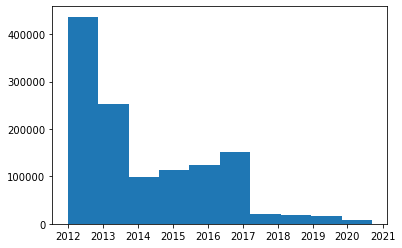

In [15]:
hist = plt.hist(missing_val_df.index) # checking the distribution of the Nan values

So we see that the Nan values are skewed to the left. Nan values are heavily present in past years than earlier years.

### Let's see the reason for the missing values as stated by Zielak the provider of the dataset so we know how to handle them.

> *CSV files for select bitcoin exchanges for the time period of Jan 2012 to September 2020, with minute to minute updates of OHLC (Open, High, Low, Close), Volume in BTC and indicated currency, and weighted bitcoin price. Timestamps are in Unix time. **TIMESTAMPS WITHOUT ANY TRADES OR ACTIVITY HAVE THEIR DATA FIELDS FILLED WITH NANS**...*

### Zielak also told us about jumps in timestamps and here is the reason:
> ***...IF A TIMESTAMP IS MISSING, OR IF THERE ARE JUMPS, THIS MAY BE BECAUSE THE EXCHANGE (OR ITS API) WAS DOWN, THE EXCHANGE (OR ITS API) DID NOT EXIST, OR SOME OTHER UNFORESEEN TECHNICAL ERROR IN THE DATA REPORTING OR GATHERING***. *All effort has been made to deduplicate entries and verify the contents are correct and complete to the best of my ability, but obviously trust at your own risk.*

So, let;s check for time jumps and contraction. Jump if any of the sampling rate is greater than a minute and contraction if it is less than a minute.

In [16]:
bitcoin_df['time_col'] = bitcoin_df.index
# taking the first order difference to get the duration of Nan values

time_jump = (bitcoin_df['time_col'] - bitcoin_df['time_col'].shift()).dropna() 
delta_time = time_jump.apply(lambda x: x.total_seconds()) # converts the duration to seconds

delta_time.head()

Timestamp
2011-12-31 07:53:00    60.0
2011-12-31 07:54:00    60.0
2011-12-31 07:55:00    60.0
2011-12-31 07:56:00    60.0
2011-12-31 07:57:00    60.0
Name: time_col, dtype: float64

In [17]:
assert delta_time.shape[0] + 1 == bitcoin_df.shape[0] # confirming the number of rows

In [18]:
print('There is {} time jump'.format((delta_time > 60).sum()))
print('There is {} time contraction'.format((delta_time < 60).sum()))

There is 1 time jump
There is 0 time contraction


So there is no time contraction, let's now find where exactly the time jump is.

In [19]:
jump_duration = delta_time[delta_time > 60].values[0]
print('time jump duration is {} days'.format(round(jump_duration/(3600*24), 3)))

time jump duration is 4.495 days


In [20]:
ind_of_time_jump = delta_time.index.get_loc(delta_time[delta_time > 60].index[0])
bitcoin_df.iloc[ind_of_time_jump: ind_of_time_jump+2]

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,time_col
Timestamp,,,,,,,,
2015-01-05 09:12:00,276.80,276.8,276.80,276.8,0.100000,27.680000,276.800000,2015-01-05 09:12:00
2015-01-09 21:05:00,272.45,305.0,272.45,291.1,175.837078,50502.066285,287.209426,2015-01-09 21:05:00


In [21]:
24*60*4 + 30

5790

Although, there are more than one reasons for jumps in 'Timestamps' as stated by Zielak, one of worth noting is that "it may be the exchange or its API was down or didn't exist. A jump of approximately 4.5 days was observed which is 5,790mins (5,790 jumps). This jump is huge and we can conclude that it may not be due to error in data gathering rather, it may be due to a downtime in API or exchanges that don't exist. This is a strong reasoning and we will decide to **NOT** impute the jumps in time because we may be too biased if we impute such a great jump.

Resampling and smoothing before feeding the dataset to a model would cater for the effect of the jumps as a result, we wouldn't sample on a daily time frame and below.

Let's check if there is any duplicate in 'Timestamp' values

In [22]:
len(bitcoin_df['time_col'].unique()) == bitcoin_df.shape[0]

True

So, we conclude that there are no duplicates in 'Timestamp' values!

Let's check the total span of the dataset.

In [23]:
print('the dataset spans for {}'.format(bitcoin_df.index[-1] - bitcoin_df.index[0]))

the dataset spans for 3179 days 16:08:00


Let's now go back to the Nan values. this time, we will be handling them. since the cause of missingness is "No trading activity", it will be biased to use imputation methods like EMA or filling with a particular value since there was no trading activity in real sense.

There are two best ways to handle missing values of this nature:
1. By filling 'Volume_(BTC)', 'Volume_(Currency)', and 'Weighted_Price' columns with zeros since there was no trading activity. Then, we do forward fill for 'Close' column and fill 'Open', 'High', and 'Low' columns with the values of the 'Close' column to make it a constant (horizontal) line of that peroid of inactivity.
2. Dropping the rows with Nan values because in actual sense, there was no trade for those periods.

WE WILL USE EACH OF THE APPROACHES TO BUILD OUR MODEL AND SELECT THE ONE WITH BEST PERFORMANCE!

### Approach 1: Imputation

In [24]:
bitcoin_df_imputation1 = bitcoin_df.copy() # makes a copy of 'bitcoin_df'. 
# 'bitcoin_df_imputation1' signifies our first approach of imputing

bitcoin_df_imputation1['Close'].fillna(method='ffill', inplace=True) # forward fill for the 'Close' column

# imputing 'Volume_(BTC)', 'Volume_(Currency)', and 'Weighted_Price' with zeros
bitcoin_df_imputation1[['Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']] = \
bitcoin_df_imputation1[['Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']].fillna(0)
bitcoin_df_imputation1.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,time_col
Timestamp,,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:52:00
2011-12-31 07:53:00,NaN,NaN,NaN,4.39,0.000000,0.0,0.00,2011-12-31 07:53:00
2011-12-31 07:54:00,NaN,NaN,NaN,4.39,0.000000,0.0,0.00,2011-12-31 07:54:00
2011-12-31 07:55:00,NaN,NaN,NaN,4.39,0.000000,0.0,0.00,2011-12-31 07:55:00
2011-12-31 07:56:00,NaN,NaN,NaN,4.39,0.000000,0.0,0.00,2011-12-31 07:56:00


In [25]:
# copying the values of 'Close' column to three columns of 'Open', 'High', and 'Low' that would later 
#be used for imputation.
impute1_df = pd.DataFrame({'Open': bitcoin_df_imputation1['Close'], 'High': bitcoin_df_imputation1['Close'], \
                          'Low': bitcoin_df_imputation1['Close']})
impute1_df.head()

,Open,High,Low
Timestamp,,,
2011-12-31 07:52:00,4.39,4.39,4.39
2011-12-31 07:53:00,4.39,4.39,4.39
2011-12-31 07:54:00,4.39,4.39,4.39
2011-12-31 07:55:00,4.39,4.39,4.39
2011-12-31 07:56:00,4.39,4.39,4.39


In [26]:
# imputation
bitcoin_df_imputation1[['Open', 'High', 'Low']] = bitcoin_df_imputation1[['Open', 'High', 'Low']].fillna( \
                                                            impute1_df)
bitcoin_df_imputation1.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,time_col
Timestamp,,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:52:00
2011-12-31 07:53:00,4.39,4.39,4.39,4.39,0.000000,0.0,0.00,2011-12-31 07:53:00
2011-12-31 07:54:00,4.39,4.39,4.39,4.39,0.000000,0.0,0.00,2011-12-31 07:54:00
2011-12-31 07:55:00,4.39,4.39,4.39,4.39,0.000000,0.0,0.00,2011-12-31 07:55:00
2011-12-31 07:56:00,4.39,4.39,4.39,4.39,0.000000,0.0,0.00,2011-12-31 07:56:00


In [27]:
print(bitcoin_df_imputation1.shape)
bitcoin_df_imputation1.isnull().sum()

(4572257, 8)


Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
time_col             0
dtype: int64

The 'Weighted_Price' column of 'df' doesn't have any value of zero, we will use this to further confirm that our imputation was done properly. 

In [28]:
(df['Weighted_Price'] == 0).sum() # checks the number of zero values in 'Weighted_Price' column of 'df'

0

In [29]:
assert (bitcoin_df_imputation1['Weighted_Price'] == 0).sum() == missing_val_mask['Open'].sum()

In [30]:
# making a list of all columns apart from 'time_col' column and'Open' column
cols = list(bitcoin_df_imputation1.columns[1:-1])

# creating the appropriate subplot indices for the cols to be used for making plots
ind = list(range(3, 9))

Let's create a function that would plot the cols and 'Open' with 'Timestamp' for a given dataframe

In [31]:
def plot_series_of_each_column(d_f, cols=cols):
    fig = plt.figure(figsize=(18, 8))
    for i, col in zip(ind, cols):
        a = fig.add_subplot(4, 2, i)
        plt.xlabel('year')
        plt.ylabel(col)
        plt.plot(d_f.index, d_f[col], '-')
        plt.grid()
    
    a = fig.add_subplot(4, 1, 1)
    plt.xlabel('year')
    plt.ylabel('Open')
    plt.plot(d_f.index, d_f['Open'], '-')
    plt.grid()

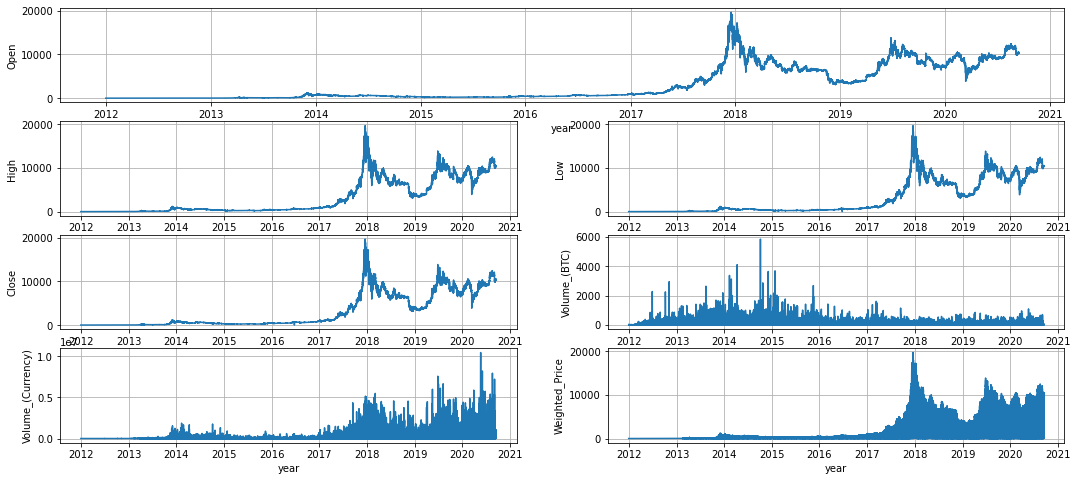

In [32]:
plot_series_of_each_column(bitcoin_df_imputation1)

### Approach 2: dropping rows with Nan values

In [33]:
bitcoin_df_imputation2 = bitcoin_df.copy() # makes a copy of 'bitcoin_df'. 
# 'bitcoin_df_imputation2' signifies our second approach of dropping rows with Nan values.

In [34]:
bitcoin_df_imputation2.dropna(inplace=True)
print(bitcoin_df_imputation2.shape)
bitcoin_df_imputation2.isnull().sum()

(3330541, 8)


Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
time_col             0
dtype: int64

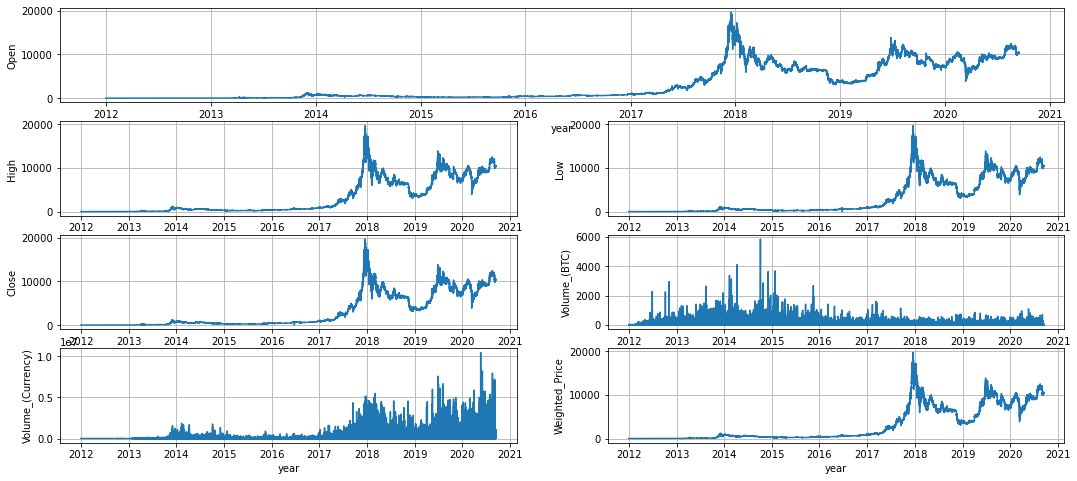

In [35]:
plot_series_of_each_column(bitcoin_df_imputation2)

### So, our next task is to build a model with each of these approaches (````bitcoin_df_imputation1```` and ````bitcoin_df_imputation2````) and then choose the model with best performance!


# Resampling

### Henceforth, variable names ending with 1 signify the usage of the first imputation approach, while those ending with a 2 signify the usage of the second imputation approach.

In [36]:
# selecting the our working column for this notebook which is the 'Open' column
open_time_series1 = bitcoin_df_imputation1['Open']
open_time_series2 = bitcoin_df_imputation2['Open']

In [37]:
daily_open_time_series1 = open_time_series1.resample('D').first().fillna(method='ffill') # downsamples to a 
                                                                                         # daily timeframe
daily_open_time_series2 = open_time_series2.resample('D').first().fillna(method='ffill') # downsamples to a
                                                                                         # daily timeframe
    
# label is set to 'left' because we want the timestamp to be the left of the bin. This is needed as those of 
# weekly and monthly is default to 'right'
weekly_open_time_series1 = open_time_series1.resample('W', label='left').first() # downsamples to a weekly 
                                                                                 # timeframe
weekly_open_time_series2 = open_time_series2.resample('W', label='left').first() # downsamples to a weekly 
                                                                                 # timeframe

monthly_open_time_series1 = open_time_series1.resample('M', label='left').first() # downsamples to a monthly 
                                                                                  # timeframe
monthly_open_time_series2 = open_time_series2.resample('M', label='left').first() # downsamples to a monthly 
                                                                                  # timeframe

# let's confirm that there are no Nan values after downsampling.
assert daily_open_time_series1.isnull().sum() == 0
assert daily_open_time_series2.isnull().sum() == 0
assert weekly_open_time_series1.isnull().sum() == 0
assert weekly_open_time_series2.isnull().sum() == 0
assert monthly_open_time_series1.isnull().sum() == 0
assert monthly_open_time_series2.isnull().sum() == 0

In [38]:
print('open_time_seies1 has been downsampled from a minute timeframe of {}'.format(open_time_series1.shape[0]) + \
      ' observations to a daily timeframe of {} observations'.format(daily_open_time_series1.shape[0]))
print()
print('open_time_seies1 has been downsampled from a minute timeframe of {}'.format(open_time_series1.shape[0]) + \
      ' observations to a weekly timeframe of {} observations'.format(weekly_open_time_series1.shape[0]))
print()
print('open_time_seies1 has been downsampled from a minute timeframe of {}'.format(open_time_series1.shape[0]) + \
      ' observations to a monthly timeframe of {} observations'.format(monthly_open_time_series1.shape[0]))
print()
print('open_time_seies2 has been downsampled from a minute timeframe of {}'.format(open_time_series1.shape[0]) + \
      ' observations to a daily timeframe of {} observations'.format(daily_open_time_series2.shape[0]))
print()
print('open_time_seies2 has been downsampled from a minute timeframe of {}'.format(open_time_series1.shape[0]) + \
      ' observations to a weekly timeframe of {} observations'.format(weekly_open_time_series2.shape[0]))
print()
print('open_time_seies2 has been downsampled from a minute timeframe of {}'.format(open_time_series1.shape[0]) + \
      ' observations to a monthly timeframe of {} observations'.format(monthly_open_time_series2.shape[0]))

open_time_seies1 has been downsampled from a minute timeframe of 4572257 observations to a daily timeframe of 3181 observations

open_time_seies1 has been downsampled from a minute timeframe of 4572257 observations to a weekly timeframe of 456 observations

open_time_seies1 has been downsampled from a minute timeframe of 4572257 observations to a monthly timeframe of 106 observations

open_time_seies2 has been downsampled from a minute timeframe of 4572257 observations to a daily timeframe of 3181 observations

open_time_seies2 has been downsampled from a minute timeframe of 4572257 observations to a weekly timeframe of 456 observations

open_time_seies2 has been downsampled from a minute timeframe of 4572257 observations to a monthly timeframe of 106 observations


This makes sense because although, ````bitcoin_df_imputation1```` and ````bitcoin_df_imputation2```` have different number of observations, they still have the same span (total duration). Let's confirm that.

In [39]:
print("bitcoin_df_imputation1's number of observation is {}".format(bitcoin_df_imputation1.shape[0]))
print("bitcoin_df_imputation2's number of observation is {}".format(bitcoin_df_imputation2.shape[0]))

bitcoin_df_imputation1's number of observation is 4572257
bitcoin_df_imputation2's number of observation is 3330541


In [40]:
assert bitcoin_df_imputation1.index[-1] - bitcoin_df_imputation1.index[0] == bitcoin_df_imputation2.index[-1] - \
                                                                                bitcoin_df_imputation2.index[0]

# Smoothing

### Let's check if there is need to smoothing the series. First, we will create a function that takes a dictionary of series name/series pairs and plot all the series as a 2x2 subplots in a 18x8 figure object. The function assumes that we would be plotting 4 subplots.


In [41]:
def plot_univariate_time_series(series):
    fig = plt.figure(figsize=(18, 12))
    
    for series_label, ind in zip(series.keys(), range(1, len(series)+1)):
        a = fig.add_subplot(3, 2, ind)
        plt.plot(series[series_label].index, series[series_label], '--')
        plt.grid()
        plt.xlabel('years')
        plt.ylabel(series_label)


In [42]:
# initializing a dictionary of series name/series pairs to use as an argument to our plot_univariate_time_series
# function

series = { 'weekly_open1': weekly_open_time_series1, 'monthly_open1': monthly_open_time_series1, \
         'weekly_open2': weekly_open_time_series2, 'monthly_open2': monthly_open_time_series2}

daily_series = {'daily_open1': daily_open_time_series1, 'daily_open2': daily_open_time_series2,}

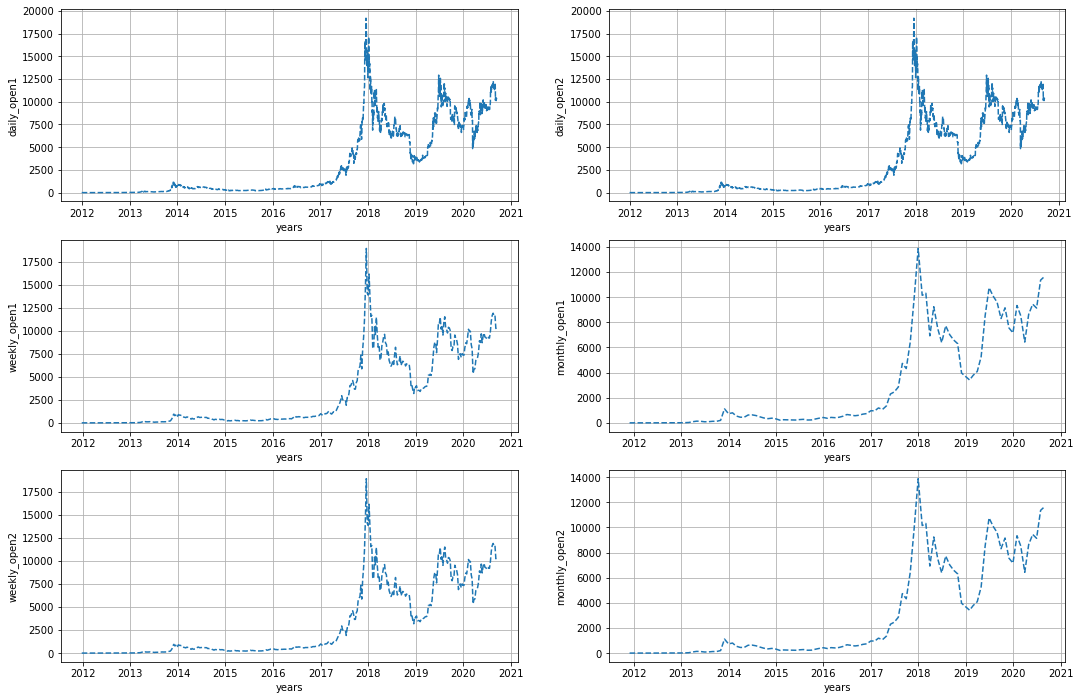

In [43]:
plot_univariate_time_series({**daily_series, **series})

#### **The Plots above looks smooth and there maybe NO need for further smoothing as it may be too baised to further smoothen the series**

# Decomposition Plot

### Let's have a look at the decomposition plot

In [44]:
# importing useful library
import statsmodels.api as sm
from pylab import rcParams

### Let's create a function that will arrange the decomposition plots of each of our series in a row

In [45]:
def decompose_time_series(series, multiplicative=False):
    fig = plt.figure(figsize=(18, 12)) # sets the mother figure size
    
    Tn = 1 + (len(series)-1)*3 # Tn = a+(n-1)d, generates a sequence
    first_row_numbers = list(range(1, Tn+1, 3)) # creates a list of the first index of the each row of the subplot
    
    for series_name, ind in zip(series.keys(), first_row_numbers):
        if multiplicative:
            decomposed_series = sm.tsa.seasonal_decompose(series[series_name], model='multiplicative')
        else:
            decomposed_series = sm.tsa.seasonal_decompose(series[series_name], model='additive')
    
        trend = decomposed_series.trend # pulls out the trend series
        seasonality = decomposed_series.seasonal # pulls out the seasonality series
        residuals = decomposed_series.resid # pulls out the residual series
        
        components = [trend, seasonality, residuals] # makes a list of trend, seasonality, and residual series
        
        # creating the subplots
        for i in range(len(components)):
            a = fig.add_subplot(6, 3, ind+i)
            plt.plot(components[i])
            plt.grid()
            
            # these conditional blocks below are to make the subplots' labels and titles to be nicely arranged
            if ind+i < 4:
                plt.title(components[i].name)
            
            if ind+i > 15:
                plt.xlabel('years')
            
            if ind+i in first_row_numbers:
                plt.ylabel(series_name)
            

### Let's check the additive decomposition plots

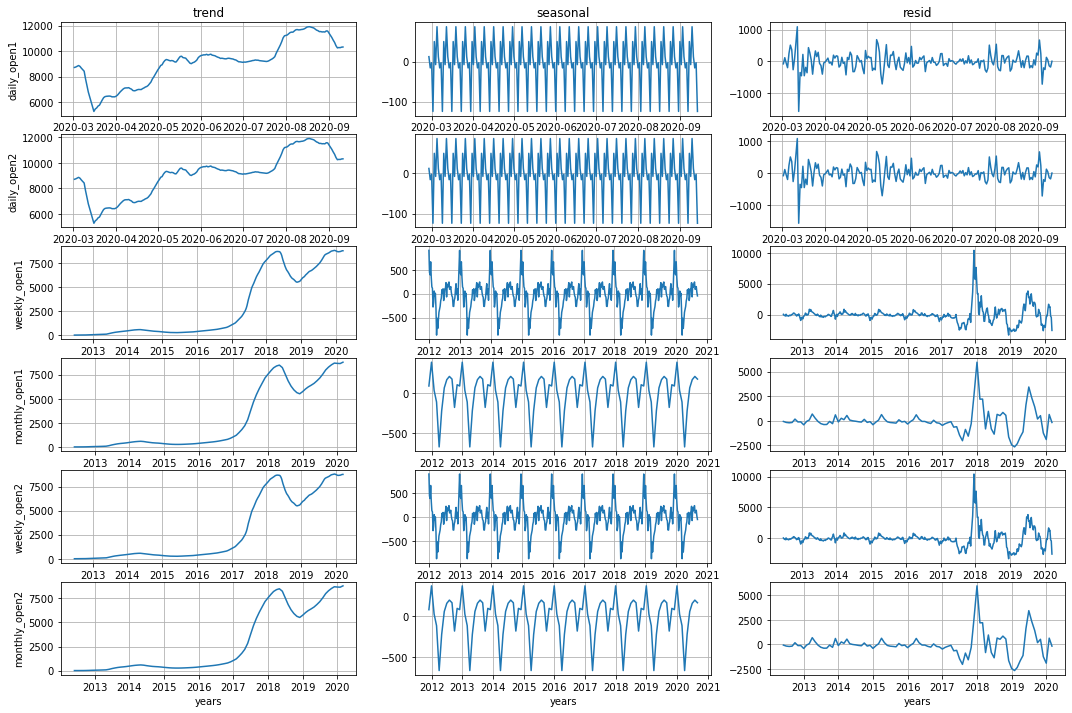

In [46]:
# checking the additive decomposition plots. We use the last 200 values for the daily series just for 
# visualization purpose because the daily series has over 3000 data points and the seasonal plot will be too 
# clumsy.
decompose_time_series({**{k: daily_series[k].tail(200) for k in daily_series}, **series}) 

### Let's check the multiplicative decomposition plots

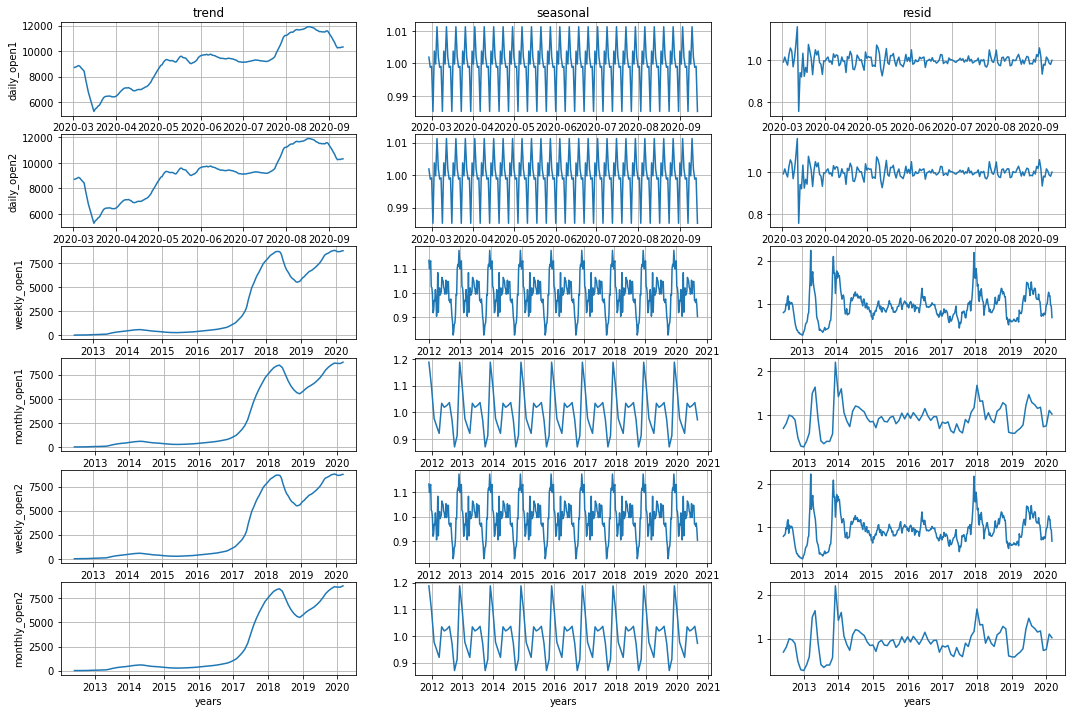

In [47]:
# checking the multiplicative decomposition plots. We use the last 200 values for the daily series just for 
# visualization purpose because the daily series has over 3000 data points and the seasonal plot will be too 
# clumsy.
decompose_time_series({**{k: daily_series[k].tail(200) for k in daily_series}, **series}, multiplicative=True) 

### There are clearly trends and seasonalities in our series. Our next task will be to make the series stationary. First, let's have a look at the ADF test to further confirm nonstationarity.

## ADF Test:

In [48]:
from statsmodels.tsa.stattools import adfuller

#### First, let's create a function that will print out the results of ADF Test on a a given number of series

In [49]:
def get_adf_results(series):
    for series_name in series:
        adf_result = adfuller(series[series_name])
        print('For {}:'.format(series_name))
        print('-'*40)
        print('ADF statistics: {}'.format(adf_result[0]))
        print('p-value: {}'.format(adf_result[1]))
        print('No of lags used: {}'.format(adf_result[2]))
        print('No of observations used: {}'.format(adf_result[3]))
        print('critical values: ')
        for k, v in adf_result[4].items():
            print('{}: {}'.format(k, v))
        print()

In [50]:
get_adf_results({**daily_series, **series}) # runs ADF Test for the six series

For daily_open1:
----------------------------------------
ADF statistics: -1.284798252123398
p-value: 0.6360981184137818
No of lags used: 29
No of observations used: 3151
critical values: 
1%: -3.432427002601706
5%: -2.8624576920765237
10%: -2.5672585088743345

For daily_open2:
----------------------------------------
ADF statistics: -1.28455072334999
p-value: 0.6362104053467457
No of lags used: 29
No of observations used: 3151
critical values: 
1%: -3.432427002601706
5%: -2.8624576920765237
10%: -2.5672585088743345

For weekly_open1:
----------------------------------------
ADF statistics: -1.3106285005791873
p-value: 0.6242958422494816
No of lags used: 11
No of observations used: 444
critical values: 
1%: -3.4451642100030084
5%: -2.8680716196949327
10%: -2.5702491139112085

For monthly_open1:
----------------------------------------
ADF statistics: -0.6870376107011695
p-value: 0.8500785798061868
No of lags used: 0
No of observations used: 105
critical values: 
1%: -3.4942202045135513

#### From all the results obtained, the p-value is greater than even the 10% significant level and the ADF statistics is greater than all the critical values. This confirms that the series are indeed non-stationary.

## Making the series staionary:
#### First, let;s create a function that will take keys of dictionary of series and the degree of differencing and returns a tuple of the differenced series and also plot the series

In [51]:
def remove_trend_and_season(series, n_diff=1):
    fig = plt.figure(figsize=(10, 4))
    
    results = []
    
    for series_name, ind in zip(list(series.keys()), range(1, len(series)+1)):
        a = fig.add_subplot(1, 2, ind)
        series_log = np.log(series[series_name])
        series_diff = series_log
        
        for _ in range(n_diff):
            series_diff = series_diff.diff(periods=1).dropna()
        
        results.append(series_diff)
        
        plt.plot(series_diff)
        plt.grid()
        plt.xlabel('years')
        plt.ylabel(series_name)
        
    return tuple(results)

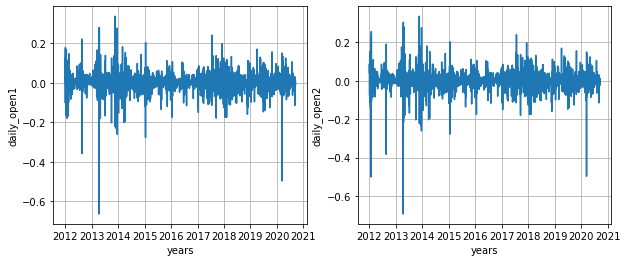

In [52]:
stationary_daily1, stationary_daily2 = remove_trend_and_season(daily_series)

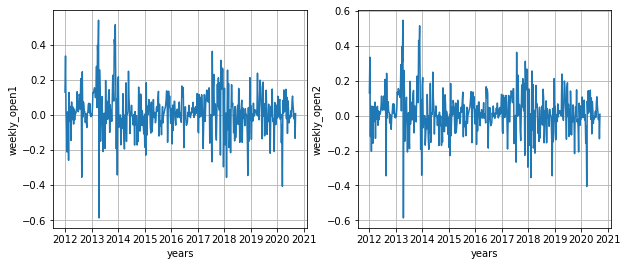

In [53]:
stationary_weekly1, stationary_weekly2 = remove_trend_and_season({k: series[k] for k in list(series.keys())[::2]})

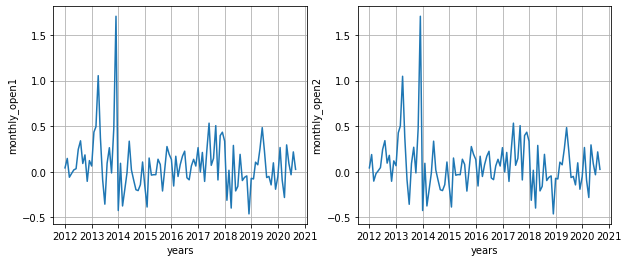

In [54]:
stationary_monthly1, stationary_monthly2 = remove_trend_and_season({k: series[k] for k in \
                                                                   list(series.keys())[1::2]})

#### From the plots above,  ````daily_open1```` , ````daily_open2```` ,````weekly_open1```` , ````weekly_open2```` , ````monthly_open1```` and ````monthly_open2````seem to be stationary after taking a logarithmic transformation and the first degree difference. Let's further confirm that these are now stationary by doing now doing the ADF test.

In [55]:
# making a dictionary of series name/stationary series pairs
stationary_series = dict([('daily_open1', stationary_daily1), ('daily_open2', stationary_daily2),
                          ('weekly_open1', stationary_weekly1), ('weekly_open2', stationary_weekly2),
                          ('monthly_open1', stationary_monthly1), ('monthly_open2', stationary_monthly2)])

In [56]:
get_adf_results(stationary_series) # gets the ADF results

For daily_open1:
----------------------------------------
ADF statistics: -10.105622965023864
p-value: 1.0318068567250092e-17
No of lags used: 23
No of observations used: 3156
critical values: 
1%: -3.4324237093576846
5%: -2.862456237513167
10%: -2.5672577344900813

For daily_open2:
----------------------------------------
ADF statistics: -10.122352902628977
p-value: 9.372694867768649e-18
No of lags used: 23
No of observations used: 3156
critical values: 
1%: -3.4324237093576846
5%: -2.862456237513167
10%: -2.5672577344900813

For weekly_open1:
----------------------------------------
ADF statistics: -10.210776724195691
p-value: 5.645973171191206e-18
No of lags used: 2
No of observations used: 452
critical values: 
1%: -3.444900499925237
5%: -2.8679556266351653
10%: -2.570187288941969

For weekly_open2:
----------------------------------------
ADF statistics: -10.091153407012532
p-value: 1.121282645974296e-17
No of lags used: 2
No of observations used: 452
critical values: 
1%: -3.4449

#### From all the results obtained, the p-value is lesser than even 1% significant level and the ADF statistics is lesser than all the critical values. This confirms that the series are indeed now stationary.

## ACF and PACF plots

In [57]:
# importing useful libraries
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [58]:
def get_acf_pacf_plots(series, lags=range(25)):
    fig = plt.figure(figsize=(18, 24))
    
    for series_name, ind in zip(series.keys(), range(1, 12, 2)):
        a = fig.add_subplot(6, 2, ind)
        plt.ylabel(series_name)
                
        if ind == 11:
            plt.xlabel('lags')
                
        plot_acf(series[series_name], ax=a, lags=lags)
        
        if ind > 1:
            plt.title('')
        
    for series_name, ind in zip(series.keys(), range(2, 13, 2)):
        a = fig.add_subplot(6, 2, ind)
                
        if ind == 12:
            plt.xlabel('lags')
                
        plot_pacf(series[series_name], ax=a, lags=lags)
        
        if ind > 2:
            plt.title('')

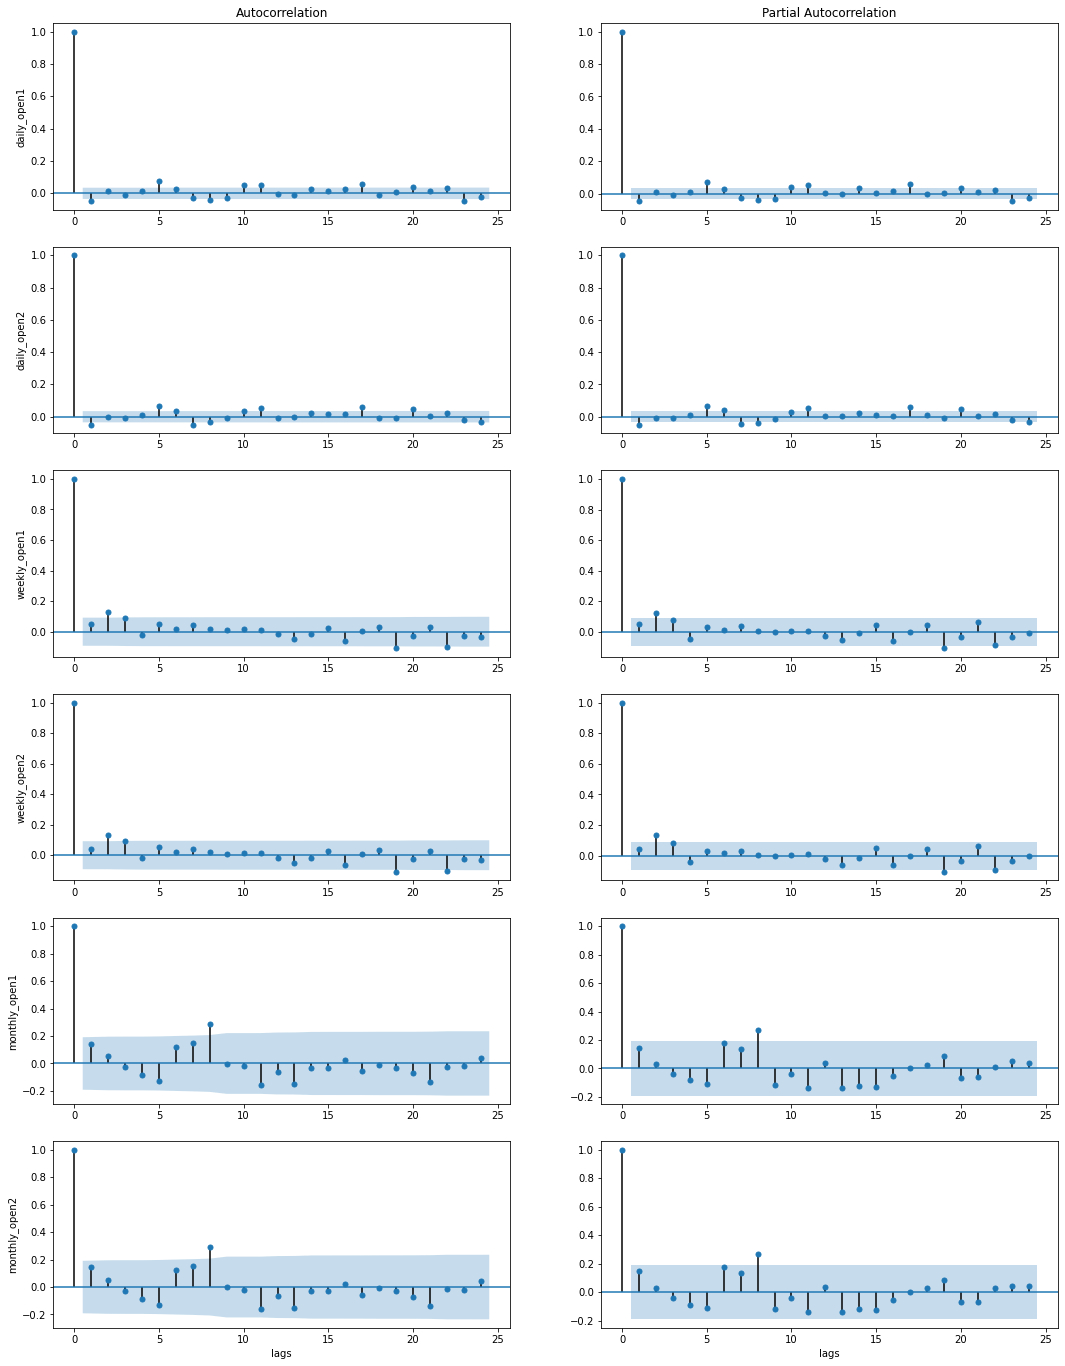

In [59]:
get_acf_pacf_plots(stationary_series)

### From the plots, for the daily series; p=1, q=1, we already know that d=1(after log transformation). For the weekly series; p=0, q=0, no significant seasonality at the 52th lag. 
### For the monthly series; p=0, q=0, no significant seasonality at the 12th lag. 

## So after log transformation, we will use ARIMA(1,1,1) for the daily series. The weekly series and monthly series are cannont be modelled with an ARIMA model.

## ARIMA model:

In [60]:
# importing useful libraries
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error as mse

In [61]:
# creating a time series spli function
def ts_train_test_split(series, start_walk):
    train, test = series[series.index < start_walk], series[series.index >= start_walk]
    return train, test

In [62]:
# creating a walk forward fuction that will split a time series into training and testing, and return a tuple of
# the test set and the predicited test set
def walk_forward_ARIMA(series, start_walk, order):
    
    train, test = ts_train_test_split(series, start_walk)
        
    history = [x for x in train]
    forecasts = []
    
    for t in range(test.shape[0]):
        model = ARIMA(history, order=order)                
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0][0]
        forecasts.append(yhat)
        history.append(test[t])
                      
    return np.exp(test), pd.Series(np.exp(forecasts), index=test.index)       

### For our forecast, we will be forecasting from 14th September, 2020 to 31st December 2020. This means 108days for a daily time frame, 15weeks for a weekly timeframe and 3months for a monthly timeframe.

In [63]:
daily_start_walk = daily_open_time_series1.index[-108] # starts a walk forward from 108days backtime
daily_ARIMA_results = [] # list to store the results

# for each imputation approach;
for daily in daily_series:
    # get the ARIMA results
    daily_ARIMA_results.append(walk_forward_ARIMA(np.log(daily_series[daily]), daily_start_walk, (1, 1, 1)))

In [64]:
# creating a function that will plot the predicted test series against the actual test series
def plot_true_pred(results, series_names):
    fig = plt.figure(figsize=(18, 4))
    
    for res, series_name, ind in zip(results, series_names, range(len(results))):
        a = fig.add_subplot(1, 2, ind+1)
        plt.plot(res[0])
        plt.plot(res[1])
        plt.legend(['true', 'pred'])
        plt.xlabel('dates')
        plt.ylabel(series_name)

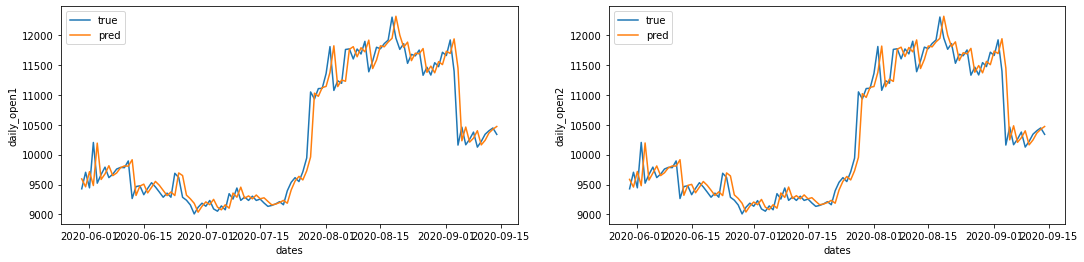

In [65]:
plot_true_pred(daily_ARIMA_results, list(daily_series.keys())) # plots for daily time frame

In [66]:
def mape(y_true, y_pred):
    y_true = y_true[y_true != 0]
    y_pred = y_pred[y_pred != 0]
    abs_error = np.abs(y_true - y_pred)
    
    return (100/y_true.shape[0]) * np.sum(abs_error/y_true)

In [67]:
for i in range(len(daily_ARIMA_results)):
    print('RMSE and MAPE of daily_open_time_series{} for an ARIMA model are {} and {}% '.format(\
        i+1, round(mse(daily_ARIMA_results[i][0], daily_ARIMA_results[i][1], squared=False), 3),
        round(mape(daily_ARIMA_results[i][0], daily_ARIMA_results[i][1]), 3)) + 'respectively')

RMSE and MAPE of daily_open_time_series1 for an ARIMA model are 275.985 and 1.724% respectively
RMSE and MAPE of daily_open_time_series2 for an ARIMA model are 276.3 and 1.726% respectively


### From the rmse results, a daily time frame with the first imputation method performed best with a RMSE and MAPE scores of 275.985 and 1.724% repectively

## Modelling the Using Facebook Prophet

In [68]:
from fbprophet import Prophet # imports Prophet

In [69]:
# creating a function that will return a dataframe compatible with Prophet
def make_fbprophet_dataframe(time_series):
    df = pd.DataFrame({'ds': time_series.index, 'y': time_series.values})
    
    return df

In [70]:
# creating a walk forward function for Prophet
def walk_forward_fbprophet(series, start_walk):
    train, test = ts_train_test_split(series, start_walk)
    df = make_fbprophet_dataframe(train)
        
    forecasts = []
    
    for t in range(test.shape[0]):
        m = Prophet(yearly_seasonality=True)
        m.fit(df)
        future = m.make_future_dataframe(periods=1)
        forecast = m.predict(future)
        yhat = forecast['yhat'].values[-1]
        forecasts.append(yhat)
        df = make_fbprophet_dataframe(series[:train.shape[0]+t+1])
        
        if t>0 and t%10==0:
            print('Done {} of {} timesteps'.format(t, test.shape[0]))
            
    print('Finished! {} of {} timesteps'.format(test.shape[0], test.shape[0]))
    
    m.plot(forecast)
                      
    return test, pd.Series(forecasts, index=test.index)       

Done 10 of 108 timesteps
Done 20 of 108 timesteps
Done 30 of 108 timesteps
Done 40 of 108 timesteps
Done 50 of 108 timesteps
Done 60 of 108 timesteps
Done 70 of 108 timesteps
Done 80 of 108 timesteps
Done 90 of 108 timesteps
Done 100 of 108 timesteps
Finished! 108 of 108 timesteps


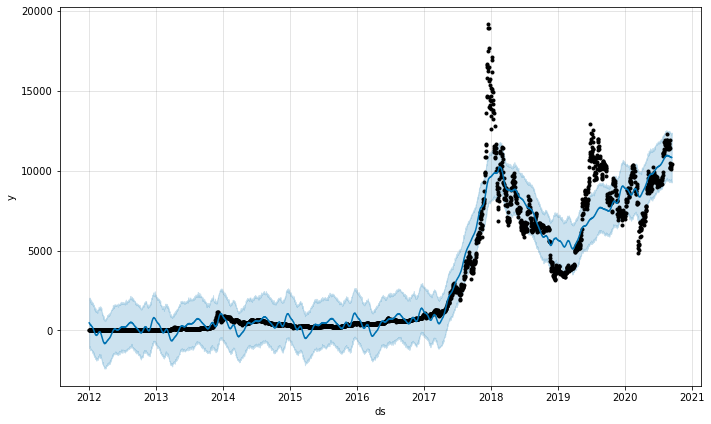

In [71]:
# Let's forecast on the daily timeframes
fbprophet_result = walk_forward_fbprophet(daily_open_time_series1, daily_start_walk) # stores the result

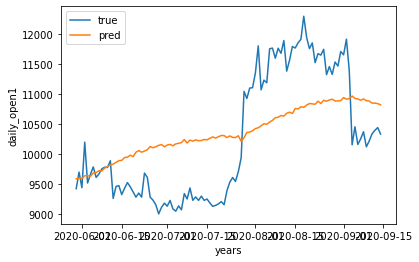

In [72]:
# let's look a the plot of 'true' against 'pred' for the testing set
plt.plot(fbprophet_result[0])
plt.plot(fbprophet_result[1])
plt.legend(['true', 'pred'])
plt.xlabel('years')
plt.ylabel('daily_open1')
plt.show()

In [73]:
print('RMSE and MAPE of daily_open_series1 for Facebook Prophet are {} and {}%'.format(round(mse( \
        fbprophet_result[0], fbprophet_result[1], squared=False), 3), round(mape(fbprophet_result[0], \
                                                                                fbprophet_result[1]), 3)))

RMSE and MAPE of daily_open_series1 for Facebook Prophet are 810.057 and 7.198%


### ARIMA model seems to perform better than Facebook Prophet.

## LSTM:

In [74]:
# importing useful libraries
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

In [75]:
scaler = MinMaxScaler(feature_range=(-1, 1))

# scaling the daily_open_time_series1
scaled_daily_open_series = scaler.fit_transform(daily_open_time_series1.values.reshape(-1, 1)).flatten()
# making it a pandas Series
scaled_daily_open_series = pd.Series(scaled_daily_open_series, index=daily_open_time_series1.index)

In [76]:
n_lags = 3 # initializing the number of lags to use

In [77]:
daily_start_walk2 = daily_open_time_series1.index[-108] # split point for train and test set

In [78]:
# spliiting the data
daily_series_train, daily_series_test = ts_train_test_split(scaled_daily_open_series, daily_start_walk2)

In [79]:
# creating a function to create features from lags of a time series
def create_features_from_time_series(series, n_lags):
    if isinstance(series, np.ndarray):
        series_values = series
    else:
        series_values = series.values
        
    X, y = [], []

    for i in range(series.shape[0] - n_lags):
        X.append(series_values[i: i+n_lags])
        y.append(series_values[i+n_lags])
        
    X = np.array(X)
    
    return X.reshape(X.shape[0], X.shape[1], 1), np.array(y)

In [80]:
X_train, y_train = create_features_from_time_series(daily_series_train, n_lags=n_lags)
X_test, y_test = create_features_from_time_series(daily_series_test, n_lags=n_lags)

In [81]:
# creating a function to build a LSTM model
def build_LSTM():
    model = Sequential()
    
    model.add(LSTM(units=50, input_shape=(X_train.shape[1], 1)))
    
    model.add(Dense(units = 1))
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model

In [82]:
model = build_LSTM()
# fits the model
history = model.fit(X_train, y_train, epochs=15, batch_size=32, shuffle=False)

Epoch 1/15
96/96 [==============================] - 0s 3ms/step - loss: 0.1620
Epoch 2/15
96/96 [==============================] - 0s 3ms/step - loss: 0.0115
Epoch 3/15
96/96 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 4/15
96/96 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 5/15
96/96 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 6/15
96/96 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 7/15
96/96 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 8/15
96/96 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 9/15
96/96 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 10/15
96/96 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 11/15
96/96 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 12/15
96/96 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 13/15
96/96 [==============================

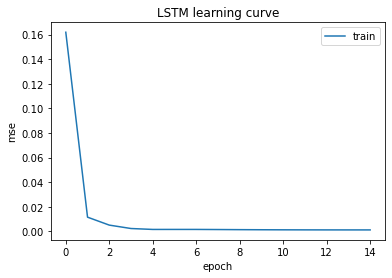

In [83]:
plt.plot(history.history['loss'])
plt.title('LSTM learning curve')
plt.xlabel('epoch')
plt.ylabel('mse')
plt.legend(['train'])
plt.show()

In [84]:
train_forecast = model.predict(X_train) # forcasts the testimg set
y_pred_train = scaler.inverse_transform(train_forecast) # inverse transform from MinMaxscaler to get the values 
                                                       # of the forecasts back in its original scale

test_forecast = model.predict(X_test) # forcasts the testimg set
y_pred_test = scaler.inverse_transform(test_forecast) # inverse transform from MinMaxscaler to get the values 
                                                       # of the forecasts back in its original scale

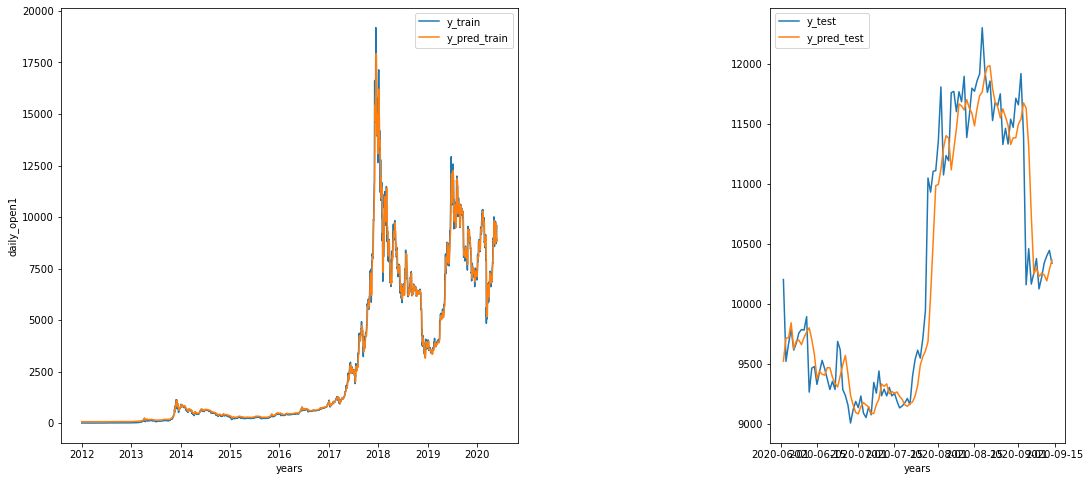

In [85]:
fig = plt.figure(figsize=(18, 8))

a = fig.add_subplot(1, 3, 3)
plt.plot(daily_open_time_series1.index[-108+n_lags:], scaler.inverse_transform(y_test.reshape(-1, 1)))
plt.plot(daily_open_time_series1.index[-108+n_lags:], y_pred_test)
plt.legend(['y_test', 'y_pred_test'])
plt.xlabel('years')

a = fig.add_subplot(1, 2, 1)
plt.plot(daily_open_time_series1.index[:-108-n_lags], scaler.inverse_transform(y_train.reshape(-1, 1)))
plt.plot(daily_open_time_series1.index[:-108-n_lags], y_pred_train)
plt.legend(['y_train', 'y_pred_train'])
plt.xlabel('years')
plt.ylabel('daily_open1')
plt.show()

In [86]:
print('train RMSE and MAPE of daily_open_series1 for LSTM model are {} and {}% respectively'.format( \
     round(mse(scaler.inverse_transform(y_train.reshape(-1, 1)), y_pred_train, squared=False), 3), \
     round(mape(scaler.inverse_transform(y_train.reshape(-1, 1)), y_pred_train), 3)))

print('test RMSE and MAPE of daily_open_series1 for LSTM model are {} and {}% respectively'.format( \
     round(mse(scaler.inverse_transform(y_test.reshape(-1, 1)), y_pred_test, squared=False), 3), \
     round(mape(scaler.inverse_transform(y_test.reshape(-1, 1)), y_pred_test), 3)))

train RMSE and MAPE of daily_open_series1 for LSTM model are 313.292 and 124.462% respectively
test RMSE and MAPE of daily_open_series1 for LSTM model are 324.465 and 1.995% respectively


### So we conclude that ARIMA performs better than LSTM and Facebook prophet for the Open column series.

### Finally, let's train on the whole training set and forecast till 31st December 2020 (108days)

### First, we create a function to do walk forward with an ARIMA model 108 steps into the future.

In [87]:
from datetime import timedelta

### Let's do a multi-step recursive forecast where we forecast for the next day and our forecast would then become part of the observations for the next day forecast. This has a drawback as dependencies will be lost and forecast errors will be carried forward. This is a common problem in time series forecasting.

In [88]:
# creating a function for recursive multistep forecasting
def recursive_multi_step_forcast(series, order, time_steps=108):

    series_log = np.log(series)
    history = [x for x in series_log]
    forecasts = []
    
    for _ in range(time_steps):
        model = ARIMA(history, order=order)                
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0][0]
        forecasts.append(yhat)
        history.append(yhat)
    
    future_dates = [series.index[-1] + timedelta(i) for i in range(1, time_steps+1)]
    
    return pd.Series(np.exp(history), index=list(series.index)+future_dates)     

In [89]:
# forecasting for the next 108 days
multi_step_forecast = recursive_multi_step_forcast(daily_open_time_series1, (1, 1, 1), 108)

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


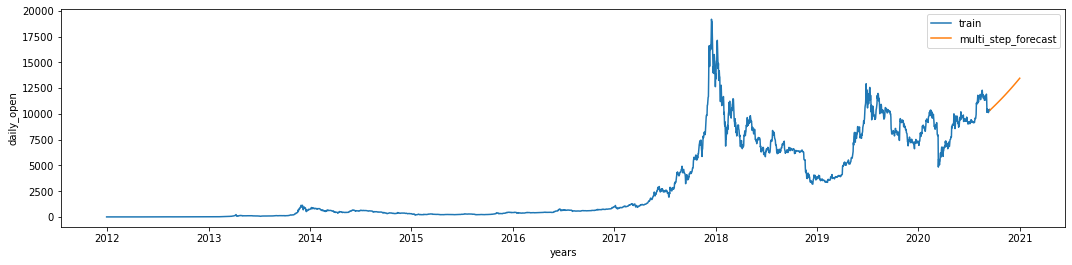

In [90]:
plt.figure(figsize=(18, 4))
plt.plot(daily_open_time_series1)
plt.plot(multi_step_forecast[-108:])
plt.legend(['train', 'multi_step_forecast'])
plt.xlabel('years')
plt.ylabel('daily_open')
plt.show()

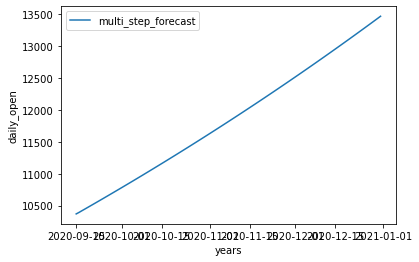

In [91]:
plt.plot(multi_step_forecast[-108:])
plt.legend(['multi_step_forecast'])
plt.xlabel('years')
plt.ylabel('daily_open')
plt.show()

### We see that our multi-step forecast lost dependencies and looks pretty like a straight line. In time series foecasting, the best we can do is One-step forecasting (forecast for the next day). So, let's see our forecast for the next day '15th september, 2020'

In [92]:
next_day = recursive_multi_step_forcast(daily_open_time_series1, (1, 1, 1), 1)

In [93]:
next_day.tail(1)

2020-09-15    10370.20754
dtype: float64

In [94]:
print('Our forcast for bitcoin Open for next day {} is {}'.format(next_day.index[-1], next_day.values[-1]))

Our forcast for bitcoin Open for next day 2020-09-15 00:00:00 is 10370.207539728694


### Our next day Open forecast should be close to the Closing price of the previous day. Let's check the closing price of the previous day

In [95]:
bitcoin_df.loc['2020-09-14', 'Close']

Timestamp
2020-09-14    10332.37
Name: Close, dtype: float64

### We see that our forecast for the Open of the next day 2020-09-15 which is 10370.21 is pretty close to the Closing price of the previous day 2020-09-14 which is 10332.37

## Let's save our multistep forcast as a csv file.

In [96]:
forecast_df = pd.DataFrame({'Open': multi_step_forecast[-108:]})
forecast_df.index.rename('date', inplace=True)
forecast_df.head()

,Open
date,
2020-09-15,10370.207540
2020-09-16,10393.846876
2020-09-17,10419.733446
2020-09-18,10445.070912
2020-09-19,10470.641610


### We now see that the forecast for September 15th, 2020 is same as our one-step forecast.

In [97]:
# saving the forecast to disk
forecast_df.to_csv('Open_column_series_forecast.csv')

# Thank you.